![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

%matplotlib inline

In [191]:
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [192]:
print("movie budgets")

#Set data type as date and time, convert data as required
movie_budgets["release_date"] = pd.to_datetime(movie_budgets["release_date"]) 
movie_budgets["year"] = movie_budgets["release_date"].dt.year.astype(int)
movie_budgets["month"] = movie_budgets["release_date"].dt.month.astype(int)

#set release date as index
movie_budgets = movie_budgets.set_index(['release_date'])



movie budgets


In [193]:
#remove $ and comma from currency string

def convert_currency(string):
    string = string.strip('$')
    string = string.replace(',', '')

    return string

#convert currency column to int64 dtype
def convert_column(column):
    column = column.map(lambda x: convert_currency(x))
    column = column.astype(float)
    return column

In [194]:
movie_budgets["production_budget"] = convert_column(movie_budgets["production_budget"])
movie_budgets["domestic_gross"] = convert_column(movie_budgets["domestic_gross"])
movie_budgets["worldwide_gross"] = convert_column(movie_budgets["worldwide_gross"])

In [195]:
#check for duplicates, resulting in no duplicates
movie_budgets = movie_budgets.loc[~movie_budgets.duplicated()]

In [196]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 2009-12-18 to 2005-08-05
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
 5   year               5782 non-null   int64  
 6   month              5782 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 361.4+ KB


In [197]:
movie_budgets = movie_budgets.rename(columns={"movie":"title"})

In [214]:
movie_budgets.head()

,id,title,production_budget,domestic_gross,worldwide_gross,year,month
release_date,,,,,,,
2009-12-18,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12
2011-05-20,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5
2019-06-07,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6
2015-05-01,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5
2017-12-15,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12


In [215]:
#find range of year reflected in data
sorted(movie_budgets["year"].unique())

[1915,
 1916,
 1920,
 1925,
 1927,
 1929,
 1930,
 1931,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

Text(0, 0.5, 'Number of movie released')

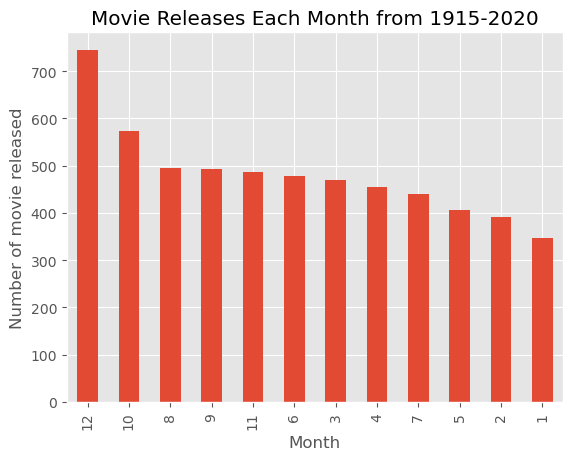

In [216]:
#count which month has the most movie releases
ax = movie_budgets["month"].value_counts().plot(kind='bar', title="Movie Releases Each Month from 1915-2020")
ax.set_xlabel("Month")
ax.set_ylabel("Number of movie released")

In [217]:
december_release = movie_budgets[movie_budgets.month == 12]
december_release.head(20)

,id,title,production_budget,domestic_gross,worldwide_gross,year,month
release_date,,,,,,,
2009-12-18,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12
2017-12-15,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12
2015-12-18,6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,12
2012-12-14,19,The Hobbit: An Unexpected Journey,250000000.0,303003568.0,1.017004e+09,2012,12
2013-12-13,21,The Hobbit: The Desolation of Smaug,250000000.0,258366855.0,9.603669e+08,2013,12
2014-12-17,22,The Hobbit: The Battle of the Five Armies,250000000.0,255119788.0,9.455776e+08,2014,12
2005-12-14,40,King Kong,207000000.0,218080025.0,5.505174e+08,2005,12
2007-12-07,41,The Golden Compass,205000000.0,70107728.0,3.672626e+08,2007,12
1997-12-19,43,Titanic,200000000.0,659363944.0,2.208208e+09,1997,12


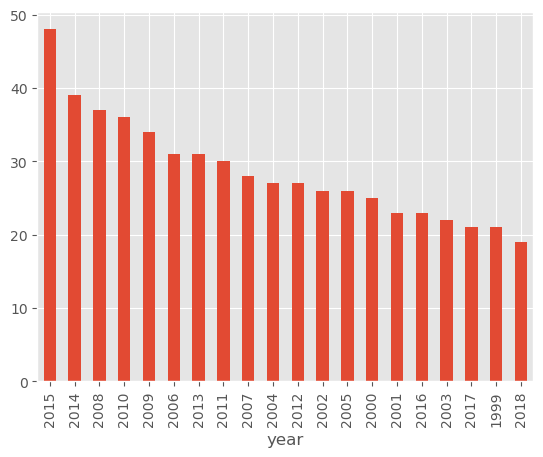

In [218]:
fig3 = december_release.groupby('year').size().sort_values(ascending=False).head(20).plot(kind = "bar")


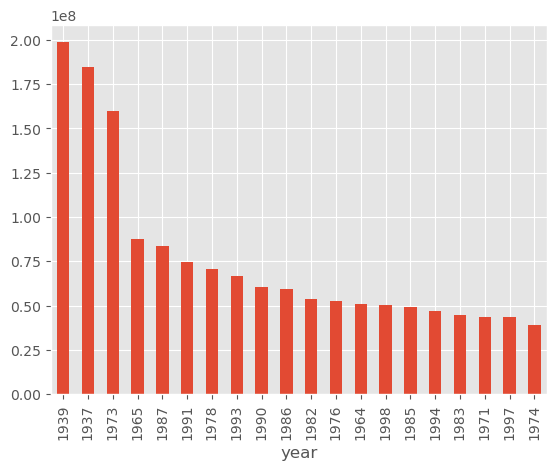

In [219]:
fig1 = december_release.groupby(['year'])['domestic_gross']\
                                .median()\
                                .sort_values(ascending=False)\
                                .head(20)\
                                .plot(kind='bar')

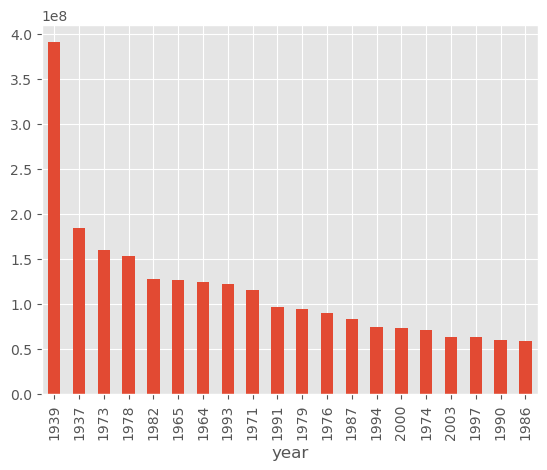

In [220]:
fig1 = december_release.groupby(['year'])['worldwide_gross']\
                                .median()\
                                .sort_values(ascending=False)\
                                .head(20)\
                                .plot(kind='bar')

In [221]:
df1 = movie_budgets.groupby(['month'])['domestic_gross'].median().to_frame()
df2 = movie_budgets.groupby(['month'])['worldwide_gross'].median().to_frame()

In [222]:
df1

,domestic_gross
month,
1,14218868.0
2,19096003.0
3,15303247.5
4,12222522.5
5,19894664.0
6,33644788.0
7,31803006.5
8,16142205.0
9,10725228.0


In [227]:
gross = df1.merge(df2, how="inner", on="month")
gross["month"] = gross.index
gross

,domestic_gross,worldwide_gross,month
month,,,
1,14218868.0,20169934.0,1
2,19096003.0,33097834.5,2
3,15303247.5,25599836.0,3
4,12222522.5,20068010.0,4
5,19894664.0,29934477.0,5
6,33644788.0,46844357.0,6
7,31803006.5,51134699.5,7
8,16142205.0,24202936.5,8
9,10725228.0,18535575.0,9


<Axes: xlabel='month'>

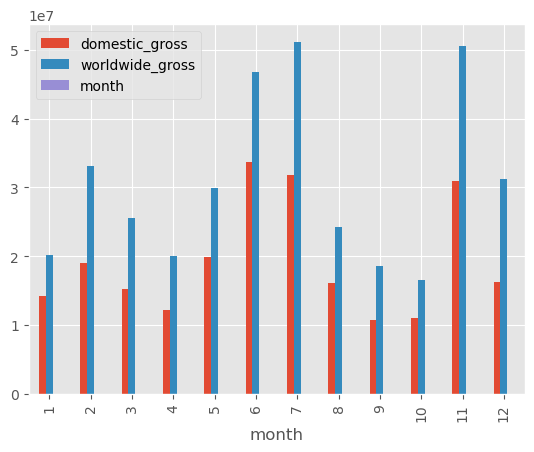

In [228]:
gross.plot(kind="bar")

In [232]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Filter out rows with missing gross or month values
# filtered_df = movie_budgets.dropna(subset=["domestic_gross", "worldwide_gross", "month"])

# Convert month to categorical
movie_budgets["month"] = movie_budgets["month"].astype("category")

# ANOVA for Domestic Gross
domestic_model = smf.ols('domestic_gross ~ C(month)', data=movie_budgets).fit()
domestic_anova = sm.stats.anova_lm(domestic_model, typ=2)

# ANOVA for Worldwide Gross
worldwide_model = smf.ols('worldwide_gross ~ C(month)', data=movie_budgets).fit()
worldwide_anova = sm.stats.anova_lm(worldwide_model, typ=2)

domestic_anova, worldwide_anova

(                sum_sq      df          F        PR(>F)
 C(month)  1.447682e+18    11.0  29.810794  7.879718e-62
 Residual  2.547316e+19  5770.0        NaN           NaN,
                 sum_sq      df          F        PR(>F)
 C(month)  9.219830e+18    11.0  28.914878  7.361590e-60
 Residual  1.672571e+20  5770.0        NaN           NaN)

In [233]:
#release month has statistically significant impact on domestic gross and worldwide gross

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

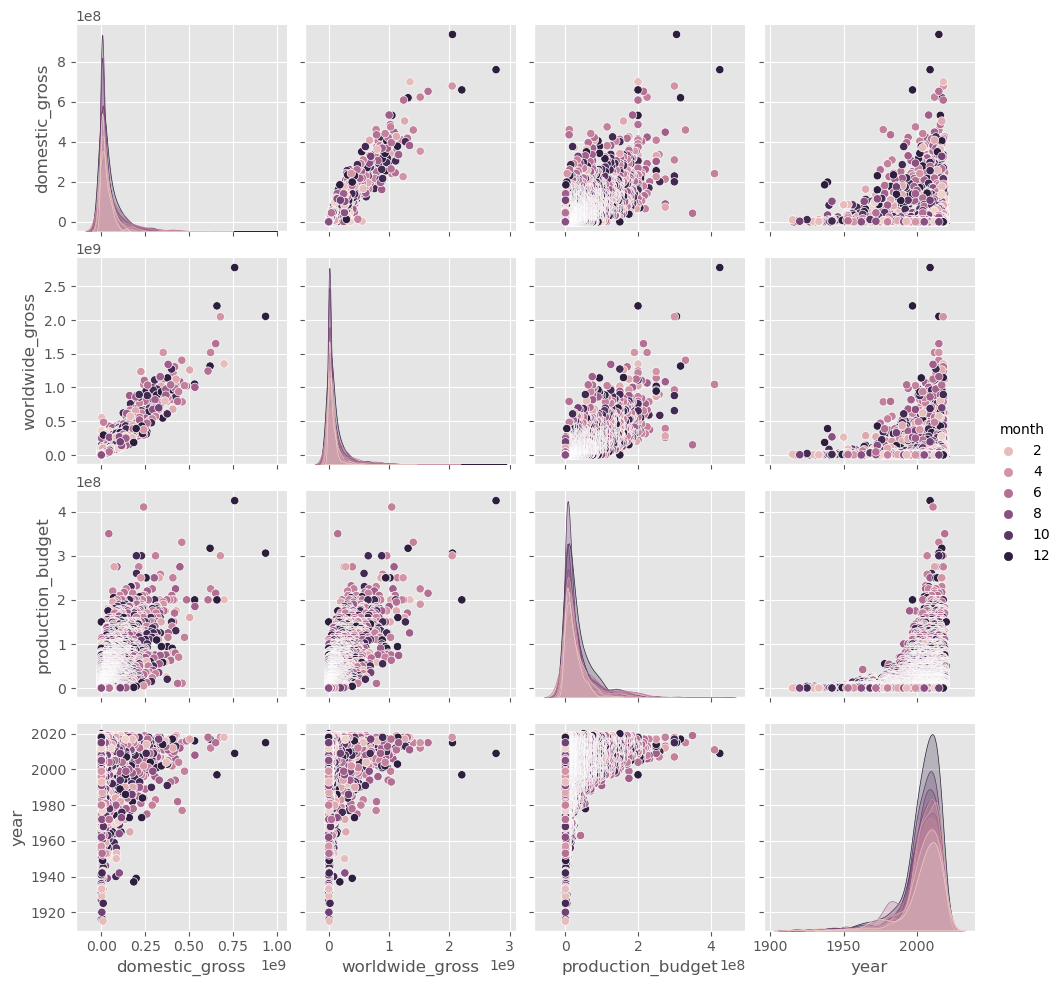

In [209]:
sns.pairplot(movie_budgets, vars=['domestic_gross','worldwide_gross','production_budget','year'], hue='month')

In [210]:
df1 = movie_budgets.iloc[:, 2:5]
corr_matrix = df1.corr()
corr_matrix

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


In [211]:
#opening im.db
conn = sqlite3.connect('./Data/im.db')
cursor = conn.cursor()

In [41]:
#checking all tables are imported from im.db
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers
8  movie_summary


In [42]:
#convert to dataframe to see data content better
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
directors = pd.read_sql("SELECT * FROM directors;", conn)
known_for = pd.read_sql("SELECT * FROM known_for;", conn)
movie_akas = pd.read_sql("SELECT * FROM movie_akas;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
persons = pd.read_sql("SELECT * FROM persons;", conn)
principals = pd.read_sql("SELECT * FROM principals;", conn)
writers = pd.read_sql("SELECT * FROM writers;", conn)

In [43]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [44]:
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [45]:
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [46]:
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [47]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [48]:
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [49]:
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [50]:
writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [125]:
#delete movie summary table if already exists
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS movie_summary;")
conn.commit()

# Create a new table with relevant columns using LEFT JOIN

cursor.execute("""CREATE TABLE movie_summary AS
                SELECT 
                    mb.movie_id,
                    mb.genres,
                    mb.primary_title,
                    mr.averagerating,
                    GROUP_CONCAT(DISTINCT ma.region) AS regions,
                    mr.numvotes
                FROM 
                    movie_basics mb
                LEFT JOIN 
                    movie_akas ma ON mb.movie_id = ma.movie_id
                LEFT JOIN 
                    movie_ratings mr ON mb.movie_id = mr.movie_id
                GROUP BY 
                    mb.movie_id, mb.primary_title, mr.numvotes;""")
conn.commit()

In [126]:
pd.read_sql("""SELECT * FROM movie_summary""", conn)

,movie_id,genres,primary_title,averagerating,regions,numvotes
0,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,IN,77.0
1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,7.2,"IN,XWW",43.0
2,tt0069049,Drama,The Other Side of the Wind,6.9,"AR,BR,DE,ES,FR,GB,IT,PL,PT,RU,US,VE",4517.0
3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,6.1,IN,13.0
4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,6.5,"CL,PL,XWW",119.0
...,...,...,...,...,...,...
146139,tt9916538,Drama,Kuambil Lagi Hatiku,NaN,None,NaN
146140,tt9916622,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,None,NaN
146141,tt9916706,Comedy,Dankyavar Danka,NaN,None,NaN
146142,tt9916730,None,6 Gunn,NaN,None,NaN


In [127]:
#remove duplicates and keep row with smallest ROWID for each movie ID

cursor.execute("""
DELETE FROM movie_summary
WHERE ROWID NOT IN (SELECT MIN(ROWID) 
                    FROM movie_summary 
                    GROUP BY movie_id);""")
conn.commit()

In [128]:
pd.read_sql("""SELECT * FROM movie_summary""", conn)
#doesn't seem like there are any duplicates

,movie_id,genres,primary_title,averagerating,regions,numvotes
0,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,IN,77.0
1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,7.2,"IN,XWW",43.0
2,tt0069049,Drama,The Other Side of the Wind,6.9,"AR,BR,DE,ES,FR,GB,IT,PL,PT,RU,US,VE",4517.0
3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,6.1,IN,13.0
4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,6.5,"CL,PL,XWW",119.0
...,...,...,...,...,...,...
146139,tt9916538,Drama,Kuambil Lagi Hatiku,NaN,None,NaN
146140,tt9916622,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,None,NaN
146141,tt9916706,Comedy,Dankyavar Danka,NaN,None,NaN
146142,tt9916730,None,6 Gunn,NaN,None,NaN


In [129]:
#remove rows where averagerating or numvotes is NULL
cursor.execute("""DELETE FROM movie_summary
WHERE averagerating IS NULL OR numvotes IS NULL;""")
conn.commit()

In [130]:
pd.read_sql("""SELECT * FROM movie_summary""", conn)
#row numbers have been reduced

,movie_id,genres,primary_title,averagerating,regions,numvotes
0,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,IN,77
1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,7.2,"IN,XWW",43
2,tt0069049,Drama,The Other Side of the Wind,6.9,"AR,BR,DE,ES,FR,GB,IT,PL,PT,RU,US,VE",4517
3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,6.1,IN,13
4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,6.5,"CL,PL,XWW",119
...,...,...,...,...,...,...
73851,tt9913084,Documentary,Diabolik sono io,6.2,None,6
73852,tt9914286,"Drama,Family",Sokagin Çocuklari,8.7,None,136
73853,tt9914642,Documentary,Albatross,8.5,None,8
73854,tt9914942,None,La vida sense la Sara Amat,6.6,None,5


In [182]:
#create pandas df from movie_summary to ease analysis
movie_summary_df = pd.read_sql("SELECT * FROM movie_summary;", conn)

In [183]:
#find all genres inside of movie_summary
movie_summary_df['genres'] = movie_summary_df['genres'].str.split(',')
exploded_df = movie_summary_df.explode('genres')
exploded_df


,movie_id,genres,primary_title,averagerating,regions,numvotes
0,tt0063540,Action,Sunghursh,7.0,IN,77
0,tt0063540,Crime,Sunghursh,7.0,IN,77
0,tt0063540,Drama,Sunghursh,7.0,IN,77
1,tt0066787,Biography,One Day Before the Rainy Season,7.2,"IN,XWW",43
1,tt0066787,Drama,One Day Before the Rainy Season,7.2,"IN,XWW",43
...,...,...,...,...,...,...
73852,tt9914286,Drama,Sokagin Çocuklari,8.7,None,136
73852,tt9914286,Family,Sokagin Çocuklari,8.7,None,136
73853,tt9914642,Documentary,Albatross,8.5,None,8
73854,tt9914942,None,La vida sense la Sara Amat,6.6,None,5


In [184]:
# in this dataset, number of movies in the sample size (based on genres or regions) are not equal
# some sample set has 1 movie, some have a lot more
# find minimum number of movie via effect size

# determine cohen's d to be d=0.2 to be confident that the small differences in average ratings 
# and votes aren't just due to random variation
# 95% confidence and 80% power

from scipy.stats import norm

# Define parameters
z_alpha_2 = norm.ppf(1 - 0.05 / 2)  # two-tailed test, 95% confidence
z_beta = norm.ppf(0.8)  # 80% power

# Effect sizes
effect_sizes = {'Small (d=0.2)': 0.2, 'Medium (d=0.5)': 0.5, 'Large (d=0.8)': 0.8}

# Calculate required sample sizes
sample_sizes = {label: ((z_alpha_2 + z_beta) / d) ** 2 for label, d in effect_sizes.items()}
sample_sizes_df = pd.DataFrame(list(sample_sizes.items()), columns=['Effect Size', 'Minimum Sample Size (per group)'])


sample_sizes_df


,Effect Size,Minimum Sample Size (per group)
0,Small (d=0.2),196.221993
1,Medium (d=0.5),31.395519
2,Large (d=0.8),12.263875


In [187]:
# Apply the filter and aggregation for genres with at least 196 movies
filtered_exploded_df = exploded_df.groupby('genres').filter(lambda x: len(x) >= 196)

# Group by genre and calculate total votes and movie count
total_votes_by_genre = filtered_exploded_df.groupby('genres').agg(
    total_votes=('numvotes', 'sum'),
    movie_count=('movie_id', 'count')
).reset_index()


total_votes_by_genre

,genres,total_votes,movie_count
0,Action,101161682,6988
1,Adventure,84232589,3817
2,Animation,15353302,1743
3,Biography,21609446,3809
4,Comedy,74305805,17290
5,Crime,39631356,4611
6,Documentary,4739345,17753
7,Drama,119567500,30788
8,Family,8636710,3412
9,Fantasy,26335704,2126


In [178]:
# Sort by total_votes descending
top_genres_by_votes = total_votes_by_genre.sort_values(by='total_votes', ascending=False).head(10)
top_genres_by_votes

,genres,total_votes,movie_count
8,Drama,119567500,30788
0,Action,101161682,6988
2,Adventure,84232589,3817
5,Comedy,74305805,17290
23,Thriller,48155313,8217
20,Sci-Fi,42960289,2206
6,Crime,39631356,4611
19,Romance,26913873,6589
10,Fantasy,26335704,2126
16,Mystery,24657286,3039


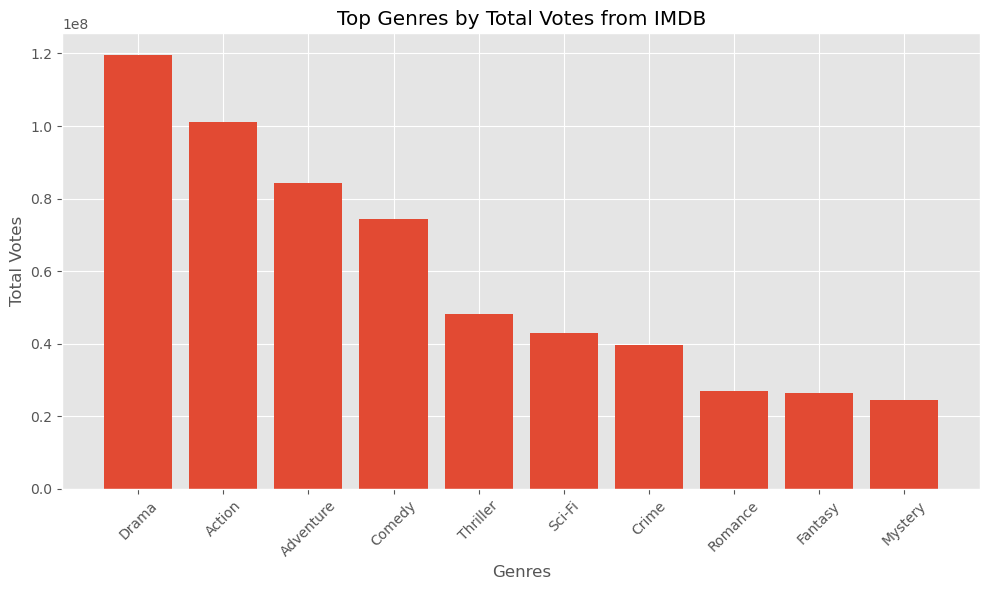

In [179]:
# Create bar plot for top genres by total votes
plt.figure(figsize=(10, 6))
plt.bar(top_genres_by_votes['genres'], top_genres_by_votes['total_votes'])
plt.xlabel('Genres')
plt.ylabel('Total Votes')
plt.title('Top Genres by Total Votes from IMDB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [272]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare data by filtering only top 10 genres
top_genres = top_genres_by_votes['genres'].tolist()
top_genre_data = exploded_df[exploded_df['genres'].isin(top_genres)]

# Convert genre to categorical
top_genre_data['genres'] = top_genre_data['genres'].astype('category')

# Run OLS model and ANOVA
model = smf.ols('numvotes ~ C(genres)', data=top_genre_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

/var/folders/y9/8wkgmh4d095_xph5_hcq73nw0000gn/T/ipykernel_27744/337540542.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genre_data['genres'] = top_genre_data['genres'].astype('category')


,sum_sq,df,F,PR(>F)
C(genres),2.168026e+12,9.0,125.721672,2.876818e-236
Residual,1.641327e+14,85661.0,NaN,NaN


In [190]:
# The F-statistic suggests strong effect of genre on vote totals. 
# The extremely low p-value suggests that this effect is statistically significant

In [147]:
#create new pandas df from movie_summary to make region-based analysis
region_summary_df = pd.read_sql("SELECT * FROM movie_summary;", conn)

In [148]:
# want to analyse movies based on regions where the movie is released in
# Split and explode regions to analyze vote counts by individual region
region_summary_df['regions'] = region_summary_df['regions'].str.split(',')
region_summary_df['region_count'] = region_summary_df['regions'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Analyze correlation between number of regions and numvotes
region_vote_relation_full = region_summary_df.groupby('region_count').agg(
    average_votes=('numvotes', 'mean'),
    total_votes=('numvotes', 'sum'),
    movie_count=('movie_id', 'count')
).reset_index().sort_values(by='region_count')

region_vote_relation_full

,region_count,average_votes,total_votes,movie_count
0,0,78.101998,336151,4304
1,1,99.266191,3937592,39667
2,2,418.039361,5257263,12576
3,3,889.730034,4656847,5234
4,4,1292.857650,3641980,2817
5,5,1986.023516,3547038,1786
6,6,2105.046167,2553421,1213
7,7,2952.882540,2790474,945
8,8,3575.026471,2431018,680
9,9,4760.984645,2480473,521


In [149]:
# Apply minimum sample size threshold of 196 movies per region count group
region_vote_filtered = region_vote_relation_full[region_vote_relation_full['movie_count'] >= 196]

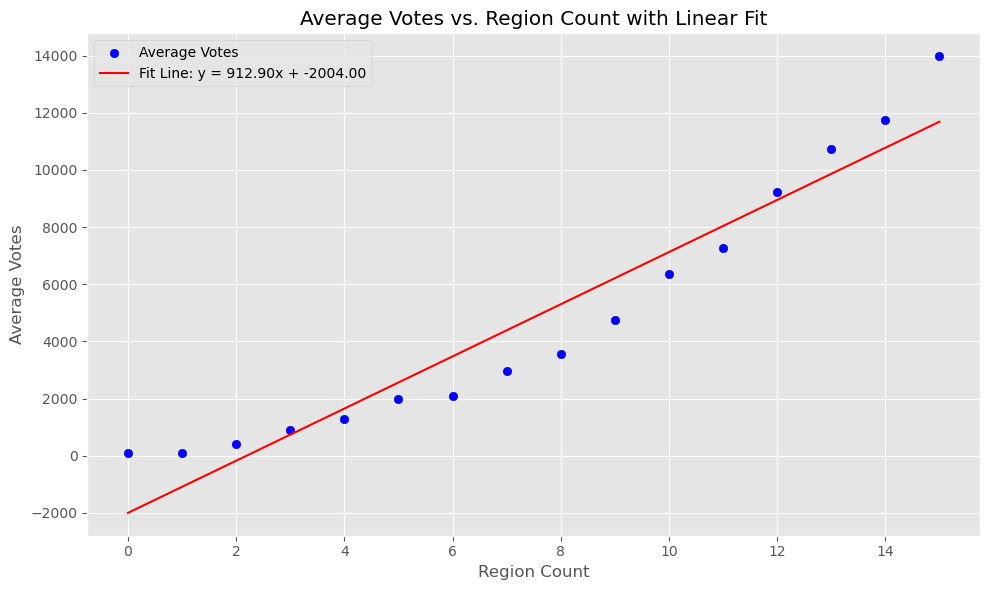

In [150]:
# Prepare data for plotting
x = region_vote_filtered['region_count']
y = region_vote_filtered['average_votes']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
poly_eq = np.poly1d(coefficients)
y_fit = poly_eq(x)

# Plot scatter and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Average Votes', color='blue')
plt.plot(x, y_fit, label=f'Fit Line: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')
plt.xlabel('Region Count')
plt.ylabel('Average Votes')
plt.title('Average Votes vs. Region Count with Linear Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [273]:
from scipy.stats import spearmanr

# Filter for region_count groups with sufficient sample size
region_vote_filtered = region_summary_df.groupby('region_count').filter(lambda x: len(x) >= 196)

# Convert region_count to categorical
region_vote_filtered['region_count'] = region_vote_filtered['region_count'].astype('category')

# Run ANOVA using statsmodels
anova_model = smf.ols('numvotes ~ C(region_count)', data=region_vote_filtered).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Spearman correlation for comparison
spearman_corr, spearman_p = spearmanr(region_vote_filtered['region_count'].cat.codes, region_vote_filtered['numvotes'])

print(f"ANOVA F-statistic: {anova_stat: .10f} \n"
      f"ANOVA p-value: {anova_p: .10f}, \n"
      f"Spearman correlation: {spearman_corr: .10f}, \n"
      f"Spearman p-value: {spearman_p:.10f}")
    


ANOVA F-statistic:  1302.0425715749 
ANOVA p-value:  0.0000000000, 
Spearman correlation:  0.5421370566, 
Spearman p-value: 0.0000000000


In [ ]:
#Statistically significant differences in numvotes across different region_count groups (p<0.05)
#Moderate positive correlation between region_count and numvotes. As the number of regions increases, vote tend to increase

In [73]:
movie_gross = pd.read_csv('./Data/bom.movie_gross.csv')

In [38]:
print("movie gross")

movie gross


In [39]:
#check for duplicates, resulting in no duplicates
movie_gross = movie_gross.loc[~movie_gross.duplicated()]

In [40]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [41]:
#there were 1350 NaN values in "Foreign Gross" column (almost 40%) - add value of 500 as outlier
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(value=500)
movie_gross["foreign_gross"] = [float(str(i).replace(",", "")) for i in movie_gross["foreign_gross"]]

#fill n/a values with median in domestic gross
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(value=movie_gross['domestic_gross'].median())

#rename N/A studios to "N/A"
movie_gross["studio"] = movie_gross["studio"].fillna(value="N/A")

In [42]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [43]:
merge_test = movie_budgets.merge(movie_gross, on="title")
merge_test.isna().sum()
merge_test.drop(["domestic_gross_y","year_x"],axis=1, inplace=True)
merge_test.dropna()
merge_test.rename(columns={"year_y":"year", "domestic_gross_x":"domestic_gross"}, inplace=True)
merge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1247 non-null   int64  
 1   title              1247 non-null   object 
 2   production_budget  1247 non-null   float64
 3   domestic_gross     1247 non-null   float64
 4   worldwide_gross    1247 non-null   float64
 5   month              1247 non-null   int64  
 6   studio             1247 non-null   object 
 7   foreign_gross      1247 non-null   float64
 8   year               1247 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 87.8+ KB


In [44]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [48]:
#how many studios in this dataset
len(movie_gross["studio"].unique())

258

In [49]:
total_domestic_gross_median = movie_gross["domestic_gross"].median()
total_domestic_gross_median

1400000.0

In [50]:
total_foreign_gross_median = movie_gross["foreign_gross"].median()
total_foreign_gross_median

1500000.0

In [51]:
#dataframe of studio domestic gross median of all the movies they have made
studio_domestic_gross = movie_gross.groupby(['studio'])['domestic_gross'].median().to_frame(name = 'studio_domestic_gross').reset_index()

#look for studios which median is higher or equal to total domestic gross median of the whole industry (based on dataset)
studio_domestic_gross = studio_domestic_gross[studio_domestic_gross["studio_domestic_gross"] >= total_domestic_gross_median]

#number of studios "doing well"
len(studio_domestic_gross)

71

In [52]:
studio_domestic_gross = studio_domestic_gross.sort_values(by="studio_domestic_gross", ascending=False)
studio_domestic_gross = studio_domestic_gross.set_index("studio")

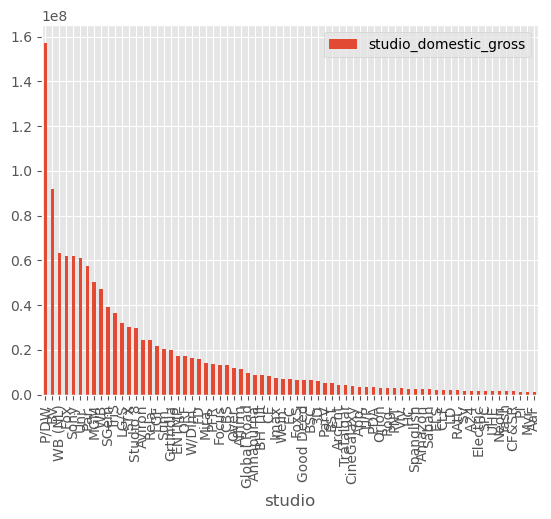

In [53]:
ax3 = studio_domestic_gross.plot(kind='bar')

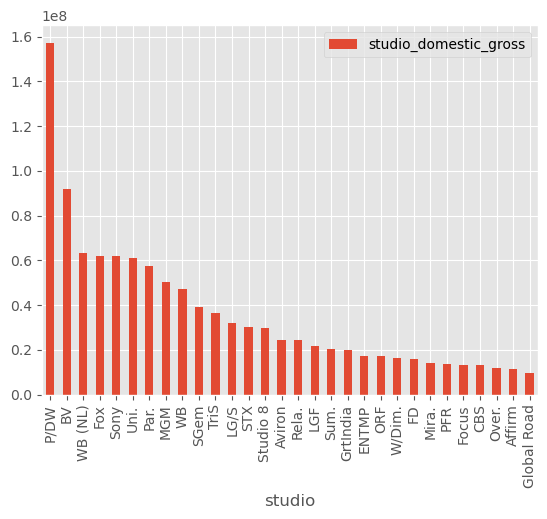

In [54]:
#get top 30 highest data points
ax3 = studio_domestic_gross.head(30).plot(kind='bar')

In [55]:
#do above process to find 30 studios with highest foreign gross

#dataframe of studio foreign gross median of all the movies they have made
studio_foreign_gross = movie_gross.groupby(['studio'])['foreign_gross'].median().to_frame(name = 'studio_foreign_gross').reset_index()

#look for studios which median is higher or equal to total foreign gross median of the whole industry (based on dataset)
studio_foreign_gross = studio_foreign_gross[studio_foreign_gross["studio_foreign_gross"] >= total_foreign_gross_median]

#number of studios "doing well"
len(studio_foreign_gross)

74

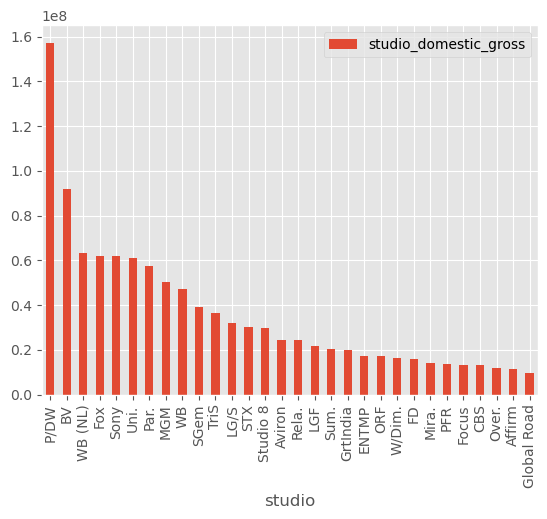

In [56]:
studio_foreign_gross = studio_foreign_gross.sort_values(by="studio_foreign_gross", ascending=False)
studio_foreign_gross = studio_foreign_gross.set_index("studio")
ax4 = studio_domestic_gross.head(30).plot(kind='bar')

In [146]:
high_earning = studio_domestic_gross.merge(studio_foreign_gross, how="inner", on="studio")
high_earning


,studio_domestic_gross,studio_foreign_gross
studio,,
P/DW,157250000.0,341500000.0
BV,92100000.0,122750000.0
WB (NL),63100000.0,81600000.0
Fox,62150000.0,88350000.0
Sony,62000000.0,75250000.0
Uni.,61000000.0,56300000.0
Par.,57700000.0,59700000.0
MGM,50300000.0,14300000.0
WB,47250000.0,60450000.0


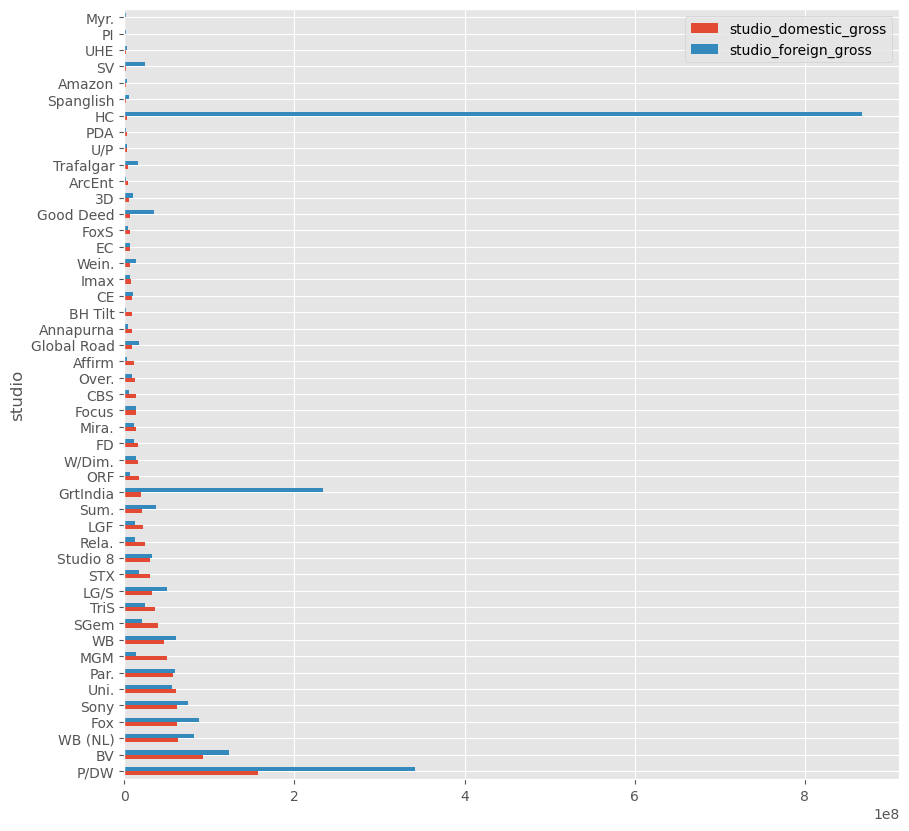

In [147]:
#get 47 studios which are above industry median both in domestic and foreign gross
ax = high_earning.plot(kind="barh", figsize=(10,10))

In [75]:
top_studios = ax.get_yticklabels()
top_studios

[Text(0, 0, 'P/DW'),
 Text(0, 1, 'BV'),
 Text(0, 2, 'WB (NL)'),
 Text(0, 3, 'Fox'),
 Text(0, 4, 'Sony'),
 Text(0, 5, 'Uni.'),
 Text(0, 6, 'Par.'),
 Text(0, 7, 'MGM'),
 Text(0, 8, 'WB'),
 Text(0, 9, 'SGem'),
 Text(0, 10, 'TriS'),
 Text(0, 11, 'LG/S'),
 Text(0, 12, 'STX'),
 Text(0, 13, 'Studio 8'),
 Text(0, 14, 'Rela.'),
 Text(0, 15, 'LGF'),
 Text(0, 16, 'Sum.'),
 Text(0, 17, 'GrtIndia'),
 Text(0, 18, 'ORF'),
 Text(0, 19, 'W/Dim.'),
 Text(0, 20, 'FD'),
 Text(0, 21, 'Mira.'),
 Text(0, 22, 'Focus'),
 Text(0, 23, 'CBS'),
 Text(0, 24, 'Over.'),
 Text(0, 25, 'Affirm'),
 Text(0, 26, 'Global Road'),
 Text(0, 27, 'Annapurna'),
 Text(0, 28, 'BH Tilt'),
 Text(0, 29, 'CE'),
 Text(0, 30, 'Imax'),
 Text(0, 31, 'Wein.'),
 Text(0, 32, 'EC'),
 Text(0, 33, 'FoxS'),
 Text(0, 34, 'Good Deed'),
 Text(0, 35, '3D'),
 Text(0, 36, 'ArcEnt'),
 Text(0, 37, 'Trafalgar'),
 Text(0, 38, 'U/P'),
 Text(0, 39, 'PDA'),
 Text(0, 40, 'HC'),
 Text(0, 41, 'Spanglish'),
 Text(0, 42, 'Amazon'),
 Text(0, 43, 'SV'),
 Text(0, 44,

In [76]:
movie_gross[movie_gross["studio"].isin(["HC","GrtIndia","P/DW"])]

,title,studio,domestic_gross,foreign_gross,year
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010
17,Megamind,P/DW,148400000.0,173500000.0,2010
71,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011
333,Kung Fu Panda 2,P/DW,165200000.0,500400000.0,2011
338,Puss in Boots,P/DW,149300000.0,405700000.0,2011
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000.0,530500000.0,2012
752,Rise of the Guardians,P/DW,103400000.0,203500000.0,2012
865,A Thousand Words,P/DW,18500000.0,3600000.0,2012


P/DW = DreamWorks
HC = Chinese studio
GrtIndia = Indian studio

number of movies released doesn't matter, but what matters is the size of the market.

In [77]:
#convert to list of studios
high_earning_list = [str(x) for x in top_studios]
high_earning_list

["Text(0, 0, 'P/DW')",
 "Text(0, 1, 'BV')",
 "Text(0, 2, 'WB (NL)')",
 "Text(0, 3, 'Fox')",
 "Text(0, 4, 'Sony')",
 "Text(0, 5, 'Uni.')",
 "Text(0, 6, 'Par.')",
 "Text(0, 7, 'MGM')",
 "Text(0, 8, 'WB')",
 "Text(0, 9, 'SGem')",
 "Text(0, 10, 'TriS')",
 "Text(0, 11, 'LG/S')",
 "Text(0, 12, 'STX')",
 "Text(0, 13, 'Studio 8')",
 "Text(0, 14, 'Rela.')",
 "Text(0, 15, 'LGF')",
 "Text(0, 16, 'Sum.')",
 "Text(0, 17, 'GrtIndia')",
 "Text(0, 18, 'ORF')",
 "Text(0, 19, 'W/Dim.')",
 "Text(0, 20, 'FD')",
 "Text(0, 21, 'Mira.')",
 "Text(0, 22, 'Focus')",
 "Text(0, 23, 'CBS')",
 "Text(0, 24, 'Over.')",
 "Text(0, 25, 'Affirm')",
 "Text(0, 26, 'Global Road')",
 "Text(0, 27, 'Annapurna')",
 "Text(0, 28, 'BH Tilt')",
 "Text(0, 29, 'CE')",
 "Text(0, 30, 'Imax')",
 "Text(0, 31, 'Wein.')",
 "Text(0, 32, 'EC')",
 "Text(0, 33, 'FoxS')",
 "Text(0, 34, 'Good Deed')",
 "Text(0, 35, '3D')",
 "Text(0, 36, 'ArcEnt')",
 "Text(0, 37, 'Trafalgar')",
 "Text(0, 38, 'U/P')",
 "Text(0, 39, 'PDA')",
 "Text(0, 40, 'HC')",
 

In [78]:

all_studios=list(movie_gross["studio"].unique())
top_studios = []

for studio in all_studios:
    for item in high_earning_list:
        if studio in item:
            top_studios.append(studio)

top_studios


['BV',
 'WB',
 'WB',
 'P/DW',
 'Sum.',
 'Par.',
 'Uni.',
 'Fox',
 'Fox',
 'Wein.',
 'Sony',
 'FoxS',
 'SGem',
 'WB (NL)',
 'LGF',
 'W/Dim.',
 'CBS',
 'Focus',
 'MGM',
 'Over.',
 'Mira.',
 '3D',
 'Rela.',
 'PDA',
 'FD',
 'TriS',
 'ORF',
 'LG/S',
 'RF',
 'ArcEnt',
 'Myr.',
 'Imax',
 'PI',
 'SV',
 'CE',
 'EC',
 'STX',
 'BH Tilt',
 'U/P',
 'UHE',
 'HC',
 'GrtIndia',
 'Good Deed',
 'Annapurna',
 'Amazon',
 'Affirm',
 'Studio 8',
 'Global Road',
 'Trafalgar',
 'Spanglish']

In [85]:
number_of_movies = movie_gross.groupby("studio").size().to_frame()
number_of_movies

,0
studio,
3D,1
A23,2
A24,49
ADC,2
AF,6
...,...
XL,2
YFG,1
Yash,14


In [86]:
movies_released = {}

for studio in top_studios:
    movies_released[studio] = int(number_of_movies.loc[studio].to_string(index=False))

movies_released

{'BV': 106,
 'WB': 140,
 'P/DW': 10,
 'Sum.': 15,
 'Par.': 101,
 'Uni.': 147,
 'Fox': 136,
 'Wein.': 77,
 'Sony': 110,
 'FoxS': 67,
 'SGem': 35,
 'WB (NL)': 45,
 'LGF': 103,
 'W/Dim.': 14,
 'CBS': 17,
 'Focus': 60,
 'MGM': 3,
 'Over.': 5,
 'Mira.': 2,
 '3D': 1,
 'Rela.': 35,
 'PDA': 3,
 'FD': 14,
 'TriS': 23,
 'ORF': 37,
 'LG/S': 41,
 'RF': 2,
 'ArcEnt': 2,
 'Myr.': 1,
 'Imax': 3,
 'PI': 1,
 'SV': 2,
 'CE': 3,
 'EC': 5,
 'STX': 24,
 'BH Tilt': 5,
 'U/P': 1,
 'UHE': 1,
 'HC': 1,
 'GrtIndia': 1,
 'Good Deed': 1,
 'Annapurna': 6,
 'Amazon': 7,
 'Affirm': 2,
 'Studio 8': 2,
 'Global Road': 3,
 'Trafalgar': 1,
 'Spanglish': 1}

In [87]:
#convert number of movies released to dataframe, then merge with gross information for high-earning studios
movies_released_df = pd.DataFrame.from_dict(movies_released, orient='index', columns=['movies_released'])
movies_released_df.index.name = "studio"
movies_released_df

,movies_released
studio,
BV,106
WB,140
P/DW,10
Sum.,15
Par.,101
Uni.,147
Fox,136
Wein.,77
Sony,110


In [88]:
df3 = high_earning.merge(movies_released_df, on="studio")
df3

,studio_domestic_gross,studio_foreign_gross,movies_released
studio,,,
P/DW,157250000.0,341500000.0,10
BV,92100000.0,122750000.0,106
WB (NL),63100000.0,81600000.0,45
Fox,62150000.0,88350000.0,136
Sony,62000000.0,75250000.0,110
Uni.,61000000.0,56300000.0,147
Par.,57700000.0,59700000.0,101
MGM,50300000.0,14300000.0,3
WB,47250000.0,60450000.0,140


/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupi

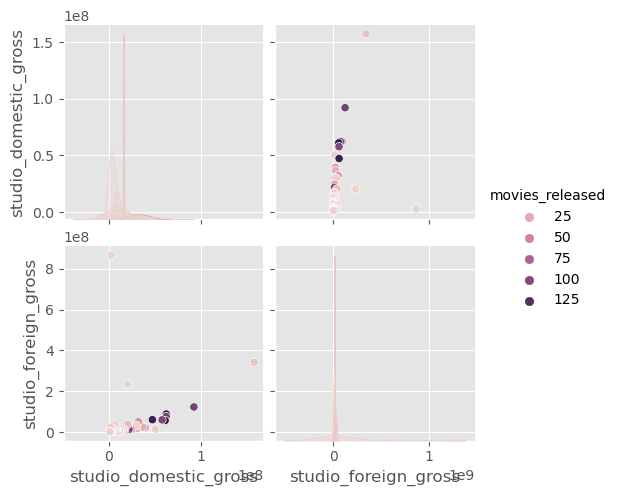

In [89]:
sns.pairplot(df3, vars=['studio_domestic_gross','studio_foreign_gross'], hue="movies_released")

/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


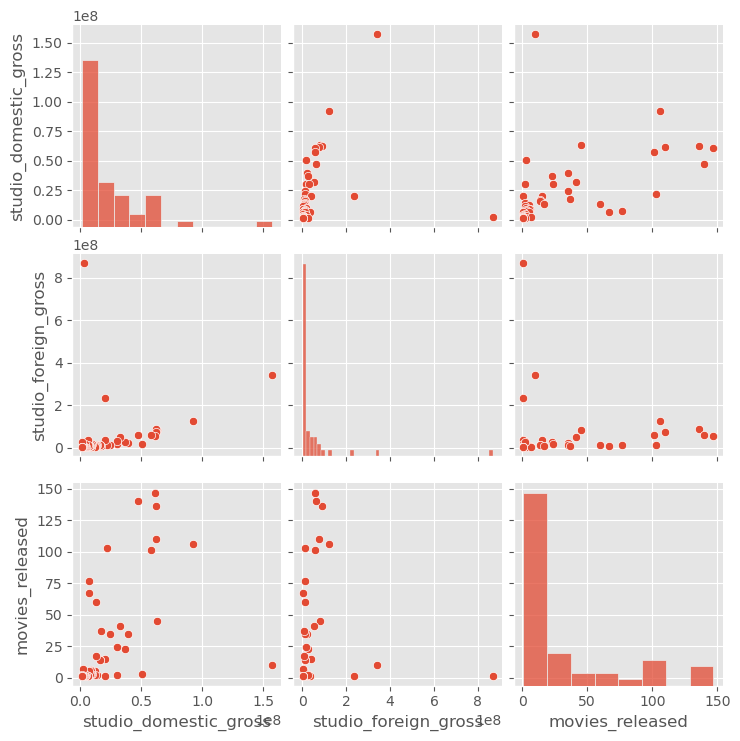

In [90]:
sns.pairplot(df3)

/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


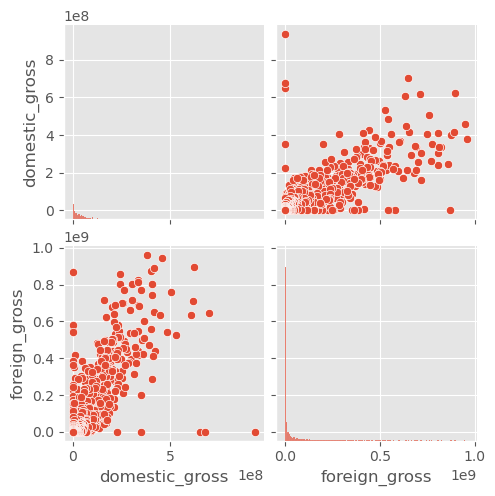

In [91]:
#overall relationship of domestic gross and foreign gross
sns.pairplot(movie_gross, vars=['domestic_gross','foreign_gross'])

In [92]:
#correlation between domestic and foreign gross for each studio and movies that they release
corr_matrix = df3.corr()
corr_matrix

,studio_domestic_gross,studio_foreign_gross,movies_released
studio_domestic_gross,1.000000,0.256213,0.486223
studio_foreign_gross,0.256213,1.000000,-0.001821
movies_released,0.486223,-0.001821,1.000000


In [234]:
movie_info = pd.read_csv('./Data/rt.movie_info.tsv', sep='\t')
tmdb_movies = pd.read_csv('./Data/tmdb.movies.csv')

In [134]:
#check for duplicates, resulting in no duplicates
movie_info = movie_info.loc[~movie_info.duplicated()]
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,108,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",41032915.0,82,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",224114.0,123,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010",134904.0,117,Unknown
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010",1039869.0,108,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005",25335935.0,119,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012",1416189.0,129,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007",59371.0,98,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,Unknown,Unknown,"Aug 30, 2002",794306.0,97,Unknown


In [95]:
print('movie info')
#movie_info
#total rows are 1560
movie_info.isna().sum()

movie info


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [96]:
# removed movies that didn't make box office
movie_info = movie_info.dropna(subset=['box_office'])
movie_info.isna().sum()

id               0
synopsis         0
rating           0
genre            0
director        41
writer          67
theater_date     6
dvd_date         6
currency         0
box_office       0
runtime          2
studio          35
dtype: int64

In [97]:
movie_info = movie_info.dropna(subset=['runtime', "theater_date"])

In [98]:
movie_info["director"] = movie_info["director"].fillna("Unknown")
movie_info["writer"] = movie_info["writer"].fillna("Unknown")
movie_info["studio"] = movie_info["studio"].fillna("Unknown")
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            332 non-null    int64 
 1   synopsis      332 non-null    object
 2   rating        332 non-null    object
 3   genre         332 non-null    object
 4   director      332 non-null    object
 5   writer        332 non-null    object
 6   theater_date  332 non-null    object
 7   dvd_date      332 non-null    object
 8   currency      332 non-null    object
 9   box_office    332 non-null    object
 10  runtime       332 non-null    object
 11  studio        332 non-null    object
dtypes: int64(1), object(11)
memory usage: 33.7+ KB


In [99]:
movie_info = movie_info.drop(["dvd_date", "currency"], axis=1)

In [149]:
box_office_mean = movie_info["box_office"].mean()
box_office_mean


38448641.415662654

<Axes: >

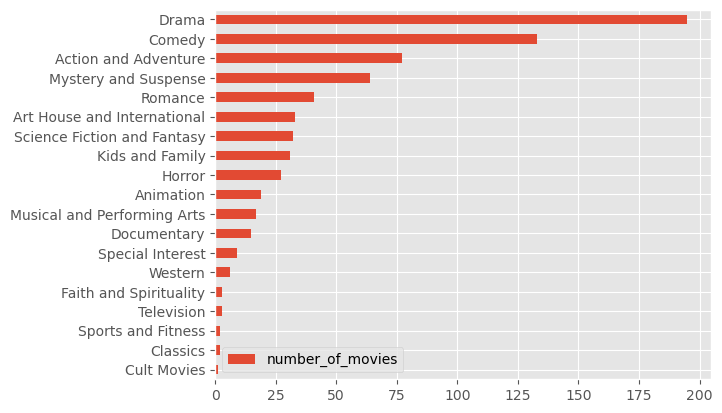

In [100]:
genre_dict = {}

for genre in movie_info["genre"]:
    movie_genres = genre.split("|")
    for movie_genre in movie_genres:
        if movie_genre not in genre_dict:
            genre_dict[movie_genre] = 1
        else:
            genre_dict[movie_genre] += 1

box_office_genre = pd.DataFrame.from_dict(genre_dict, orient='index',columns=["number_of_movies"])
df = box_office_genre.sort_values(by="number_of_movies")
df.plot(kind="barh")

<Axes: >

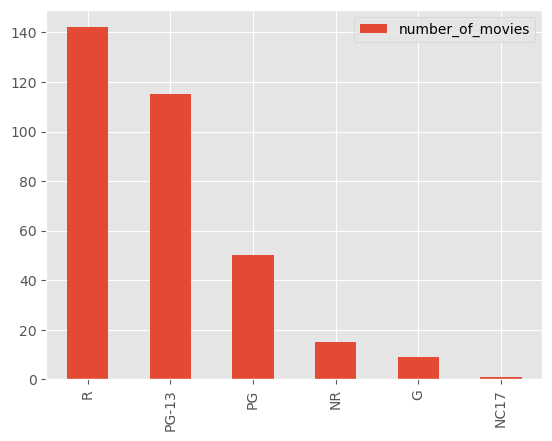

In [101]:
rating_dict = {}

for rating in movie_info["rating"]:
    if rating not in rating_dict:
            rating_dict[rating] = 1
    else:
            rating_dict[rating] += 1

box_office_rating = pd.DataFrame.from_dict(rating_dict, orient='index',columns=["number_of_movies"])
df = box_office_rating.sort_values(by="number_of_movies", ascending=False)
df.plot(kind="bar")

In [102]:
movie_info["box_office"] = convert_column(movie_info["box_office"])
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 1 to 1555
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            332 non-null    int64  
 1   synopsis      332 non-null    object 
 2   rating        332 non-null    object 
 3   genre         332 non-null    object 
 4   director      332 non-null    object 
 5   writer        332 non-null    object 
 6   theater_date  332 non-null    object 
 7   box_office    332 non-null    float64
 8   runtime       332 non-null    object 
 9   studio        332 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 28.5+ KB


In [103]:
movie_info["runtime"] = movie_info["runtime"].apply(lambda x: x.strip("minutes"))
movie_info["runtime"]

1       108 
6        82 
7       123 
8       117 
15      108 
        ... 
1541    119 
1542    129 
1545     98 
1546     97 
1555    106 
Name: runtime, Length: 332, dtype: object

In [104]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,108,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",41032915.0,82,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",224114.0,123,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010",134904.0,117,Unknown
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010",1039869.0,108,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005",25335935.0,119,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012",1416189.0,129,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007",59371.0,98,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,Unknown,Unknown,"Aug 30, 2002",794306.0,97,Unknown


<Axes: ylabel='genre'>

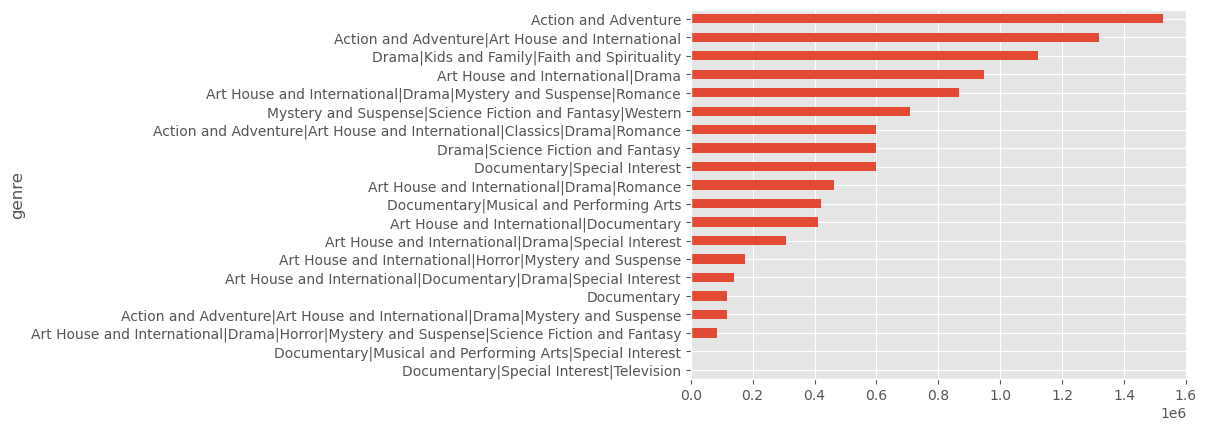

In [112]:
#combo of genres making top box office
ax = movie_info.groupby("genre")["box_office"].median().sort_values().head(20).plot(kind="barh")

In [106]:
movie_info_df = movie_info.set_index("id")
movie_info_df = movie_info_df.sort_values(by="box_office")

In [107]:
corr_matrix = movie_info.iloc[:,7: 9].corr()
corr_matrix

,box_office,runtime
box_office,1.000000,0.234604
runtime,0.234604,1.000000


In [136]:
rt_reviews = pd.read_csv('./Data/rt.reviews.tsv', sep='\t', encoding='windows-1252')

In [137]:
#check for duplicates, resulting in no duplicates
rt_reviews = rt_reviews.loc[~rt_reviews.duplicated()]
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [335]:
rt_reviews.dropna(subset=["rating"], inplace=True)
rt_reviews.drop(["critic","publisher"],axis=1, inplace=True)
rt_reviews.isna().sum()

id               0
review        5529
rating           0
fresh            0
top_critic       0
date             0
dtype: int64

In [310]:
review_letter = {"N":0.1, "R":1, "T":0.1, "F":0.1, "A":1, "B":0.75, "C":0.5, "D":0.25 }

In [338]:
def change(grade):
    if "/" in grade and " " not in grade:
        numbers = grade.split("/")
        result = float(numbers[0]) / float(numbers[1])
        return result
    elif grade[0] in "ABCDNRTF":
        result = float(review_letter[grade[0]])
        return result
    elif "." in grade:
        return round(float(grade))
    else:
        return 3
        
rt_reviews["fresh_enumerated"] = rt_reviews["rating"].apply(lambda x: float(change(x)*10))
rt_reviews

,id,review,rating,fresh,top_critic,date,fresh_enumerated
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,0,"November 10, 2018",6.0
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,0,"July 17, 2013",5.0
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,0,"April 21, 2013",4.0
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,0,"February 3, 2013",7.5
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,0,"January 15, 2013",5.0
...,...,...,...,...,...,...,...
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,1,"September 26, 2002",3.0
54428,2000,NaN,1/5,rotten,0,"September 21, 2005",2.0
54429,2000,NaN,2/5,rotten,0,"July 17, 2005",4.0
54430,2000,NaN,2.5/5,rotten,0,"September 7, 2003",5.0


In [339]:
rt_reviews_enumerated = rt_reviews.groupby("id").agg({"fresh_enumerated":"mean"})
rt_reviews_enumerated

,fresh_enumerated
id,
3,6.369469
5,6.800000
6,5.890244
8,7.575000
10,6.487705
...,...
1996,6.436957
1997,5.945652
1998,6.000000


In [340]:
merged_rating_table = movie_info_df.merge(rt_reviews_enumerated, on="id")
merged_rating_table.sort_values(by="box_office",ascending=False,inplace=True)
merged_rating_table

,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio,fresh_enumerated
id,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004",368000000.0,127,Newmarket Film Group,6.825676
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012",303001229.0,170,Warner Bros.,6.984474
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012",299300000.0,145,MGM,9.121392
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004",279167575.0,118,Universal Pictures,5.819915
1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002",261835892.0,161,Warner Bros. Pictures,7.831126
...,...,...,...,...,...,...,...,...,...,...
858,Jed Weintrob directed this look at how Interne...,R,Drama,Jed Weintrob,Jed Weintrob|Andrew Osborne,"Sep 24, 2003",25658.0,93,Indican Pictures,5.952381
1639,In this darkly erotic drama from cult filmmake...,NR,Art House and International|Drama,Jeanne Labrune,Jeanne Labrune|Richard Debuisne,"Aug 26, 2011",8856.0,95,First Run Features,5.656250
884,Freebie (James Caan) and the Bean (Alan Arkin)...,R,Action and Adventure|Comedy|Drama,Richard Rush,Robert Kaufman,"Dec 25, 1974",8300.0,114,Warner Bros. Pictures,5.812500


In [341]:
merged_rating_table["runtime"] = convert_column(merged_rating_table["runtime"])
merged_rating_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 1071 to 1260
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   synopsis          294 non-null    object 
 1   rating            294 non-null    object 
 2   genre             294 non-null    object 
 3   director          294 non-null    object 
 4   writer            294 non-null    object 
 5   theater_date      294 non-null    object 
 6   box_office        294 non-null    float64
 7   runtime           294 non-null    float64
 8   studio            294 non-null    object 
 9   fresh_enumerated  294 non-null    float64
dtypes: float64(3), object(7)
memory usage: 25.3+ KB


/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


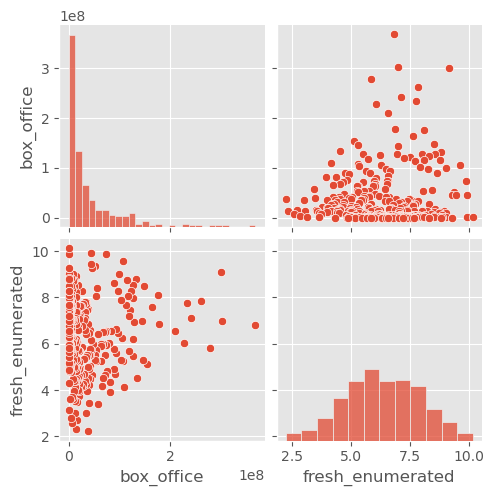

In [342]:
sns.pairplot(merged_rating_table,vars=["box_office", "fresh_enumerated"])

In [343]:
corr_matrix = merged_rating_table[["box_office","fresh_enumerated"]].corr()
corr_matrix

,box_office,fresh_enumerated
box_office,1.000000,0.100139
fresh_enumerated,0.100139,1.000000


In [246]:
tmdb_movies = pd.read_csv('./Data/tmdb.movies.csv')

In [247]:
tmdb_movies.drop(["Unnamed: 0"], axis=1, inplace=True)

In [248]:
#check for duplicates, resulting in no duplicates
tmdb_movies = tmdb_movies.loc[~tmdb_movies.duplicated()]
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [249]:
print('tmdb movies')
tmdb_movies.info()

tmdb movies
<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [256]:
movie_budgets

,id,title,production_budget,domestic_gross,worldwide_gross,year,month
release_date,,,,,,,
2009-12-18,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12
2011-05-20,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5
2019-06-07,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6
2015-05-01,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5
2017-12-15,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12
...,...,...,...,...,...,...,...
2018-12-31,78,Red 11,7000.0,0.0,0.000000e+00,2018,12
1999-04-02,79,Following,6000.0,48482.0,2.404950e+05,1999,4
2005-07-13,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,7


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

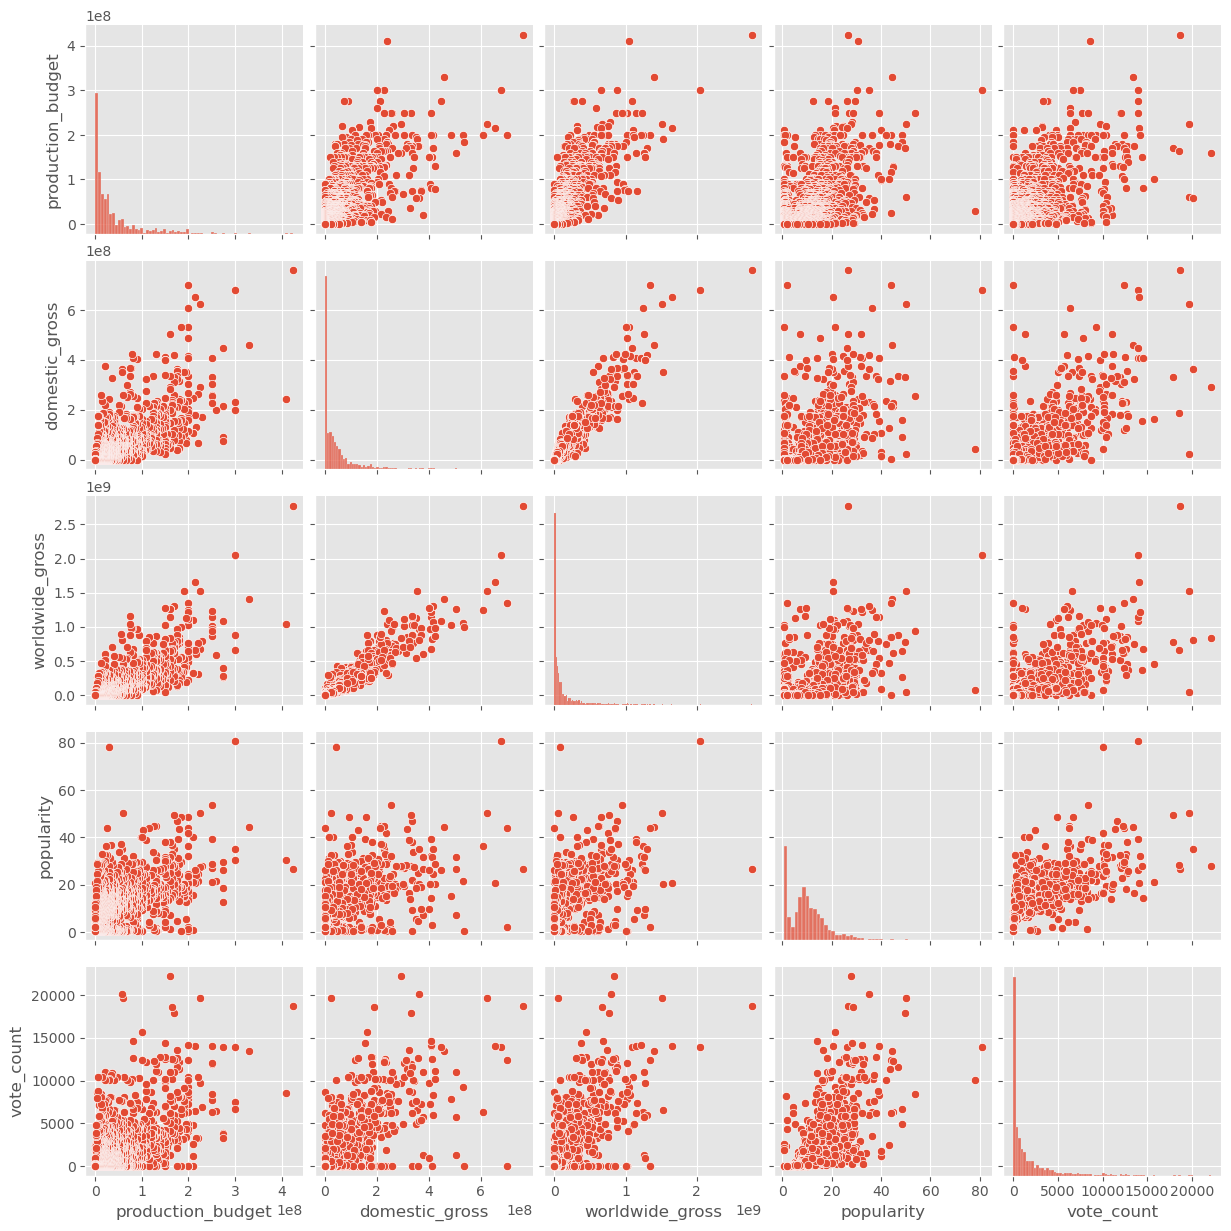

In [265]:
#check correlation between production budget and audience engagement

# Merge on title
combined_df = pd.merge(movie_budgets, tmdb_movies, on='title', how='inner')
sns.pairplot(combined_df, vars=['production_budget','domestic_gross','worldwide_gross','popularity','vote_count']);


In [266]:
# Analyze correlation
correlations = combined_df[['production_budget', 'domestic_gross', 'worldwide_gross', 'popularity', 'vote_count']].corr();
correlations

,production_budget,domestic_gross,worldwide_gross,popularity,vote_count
production_budget,1.000000,0.720301,0.794036,0.548022,0.607790
domestic_gross,0.720301,1.000000,0.945599,0.530075,0.700755
worldwide_gross,0.794036,0.945599,1.000000,0.555343,0.717538
popularity,0.548022,0.530075,0.555343,1.000000,0.731124
vote_count,0.607790,0.700755,0.717538,0.731124,1.000000


In [255]:
# tmdb_sequel= tmdb_movies.copy()

# #find movies that belong to a sequel/ franchise
# # use tmdb api "belonging to collection" info 
# # this takes sooooo long so for future work

# import requests
# import time
# import pandas as pd

# # TMDB API key
# api_key = "d31374781ba40ad951086d1c31e5222c"

# # Base URL
# base_url = "https://api.themoviedb.org/3/movie/"

# # Safe API call function
# def get_collection(movie_id):
#     url = f"{base_url}{movie_id}?api_key={api_key}"
#     try:
#         response = requests.get(url, timeout=10)
#         if response.status_code == 200:
#             data = response.json()
#             collection = data.get("belongs_to_collection")
#             return collection["name"] if collection else "0"
#         else:
#             print(f"Skipped {movie_id}: HTTP {response.status_code}")
#             return "0"
#     except requests.RequestException as e:
#         print(f"Error for {movie_id}: {e}")
#         return "0"

# # Apply with feedback and rate limiting
# collections = []
# for i, movie_id in enumerate(tmdb_sequel['id']):
#     if pd.isna(movie_id):
#         collections.append("0")
#         continue
#     collections.append(get_collection(int(movie_id)))
#     if i % 20 == 0:
#         print(f"Processed {i}/{len(tmdb_sequel)}")
#     time.sleep(0.3)  # respects TMDB rate limits

#     # Save results
# tmdb_sequel["belonging_to_collection"] = collections


Processed 0/25497
Processed 20/25497
Processed 40/25497
Processed 60/25497
Processed 80/25497
Processed 100/25497
Processed 120/25497
Processed 140/25497
Processed 160/25497
Processed 180/25497
Skipped 278604: HTTP 404
Processed 200/25497
Processed 220/25497
Processed 240/25497
Processed 260/25497
Processed 280/25497
Processed 300/25497
Processed 320/25497
Processed 340/25497
Processed 360/25497
Processed 380/25497
Processed 400/25497
Processed 420/25497
Processed 440/25497
Processed 460/25497
Processed 480/25497
Processed 500/25497
Processed 520/25497
Processed 540/25497
Processed 560/25497
Processed 580/25497
Skipped 40170: HTTP 404
Processed 600/25497
Processed 620/25497
Processed 640/25497
Processed 660/25497
Processed 680/25497
Processed 700/25497
Skipped 117232: HTTP 404
Processed 720/25497
Processed 740/25497
Processed 760/25497
Processed 780/25497
Processed 800/25497
Processed 820/25497
Processed 840/25497
Processed 860/25497
Skipped 49754: HTTP 404
Skipped 57622: HTTP 404
Proc

KeyboardInterrupt: 

In [119]:
#Set data type as date and time, convert data as required
tmdb_movies["release_date"] = pd.to_datetime(tmdb_movies["release_date"]) 
tmdb_movies["year"] = tmdb_movies["release_date"].dt.year.astype(int)
tmdb_movies["month"] = tmdb_movies["release_date"].dt.month.astype(int)

In [120]:
merged_table2 = movie_info.merge(tmdb_movies, on="id")
merged_table2

,id,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month
0,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016",5051927.0,116,Open Road Films,"[28, 53, 878, 12]",en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,1998,7
1,755,Directing his first film since 1998's Lethal W...,PG-13,Action and Adventure|Science Fiction and Fantasy,Richard Donner,Jeff Maguire|George Nolfi,"Nov 26, 2003",19375474.0,116,Paramount Pictures,"[27, 28, 53, 80]",en,From Dusk Till Dawn,16.064,1996-01-19,From Dusk Till Dawn,7.0,3015,1996,1
2,862,A man is being driven crazy by his shiftless b...,PG-13,Comedy,Anthony Russo|Joe Russo,Unknown,"Jul 13, 2006",75604320.0,109,Universal Pictures,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
3,863,"Brit (Ashley Benson), Candy (Vanessa Hudgens),...",R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013",13900000.0,93,A24 Films,"[16, 35, 10751]",en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,1999,11
4,887,Alfie Elkins is a philosophical womanizer who ...,R,Comedy|Drama|Romance,Charles Shyer,Charles Shyer|Elaine Pope,"Nov 5, 2004",13351235.0,105,Paramount Pictures,"[18, 36, 10749]",en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,1946,12
5,1865,"When a weathered, God-fearing ex-blues musicia...",R,Drama,Craig Brewer,Craig Brewer,"Mar 2, 2007",9262318.0,115,Paramount Vantage,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011,5


In [121]:
merged_table2.info()
# only 6 rows, ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 6 non-null      int64         
 1   synopsis           6 non-null      object        
 2   rating             6 non-null      object        
 3   genre              6 non-null      object        
 4   director           6 non-null      object        
 5   writer             6 non-null      object        
 6   theater_date       6 non-null      object        
 7   box_office         6 non-null      float64       
 8   runtime            6 non-null      object        
 9   studio             6 non-null      object        
 10  genre_ids          6 non-null      object        
 11  original_language  6 non-null      object        
 12  original_title     6 non-null      object        
 13  popularity         6 non-null      float64       
 14  release_date  

In [122]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
 9   year               25497 non-null  int64         
 10  month              25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 2.3+ MB


In [123]:
tmdb_movies.set_index("title",inplace=True)
tmdb_movies = tmdb_movies.sort_values(by="popularity",ascending=False)
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,year,month
title,,,,,,,,,,
Avengers: Infinity War,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,2018,4
John Wick,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,7.2,10081,2014,10
Spider-Man: Into the Spider-Verse,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,8.4,4048,2018,12
The Hobbit: The Battle of the Five Armies,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,7.3,8392,2014,12
The Avengers,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,7.6,19673,2012,5
...,...,...,...,...,...,...,...,...,...,...
The Last Laugh,[99],343887,en,The Last Laugh,0.600,2016-04-18,7.2,6,2016,4
Pombo Loves You,"[16, 18]",379377,en,Pombo Loves You,0.600,2016-01-23,7.3,2,2016,1
Maurizio Cattelan: Be Right Back,[99],390784,en,Maurizio Cattelan: Be Right Back,0.600,2016-04-24,7.3,4,2016,4


In [124]:
genre_dict = {"28":  "Action", "12":  "Adventure", "16":  "Animation", "35":  "Comedy", "80":  "Crime", 
              "99":  "Documentary", "18":  "Drama", "10751":   "Family", "14":  "Fantasy", "36":  "History",
              "27":  "Horror", "10402":   "Music", "9648":    "Mystery", "10749":   "Romance",
              "878": "Science Fiction", "10770":   "TV Movie", "53":  "Thriller", "10752":   "War",
              "37":  "Western"}



In [125]:
def change_genres(x):
    genres = []
    genre_list = x.strip("]").strip("[").split(",")
    genre_list = [id.strip(" ") for id in genre_list]
    for genre in genre_list:
        if genre in genre_dict:
            genres.append(genre_dict[genre])
        else:
            genres.append("Other")
    return "|".join(genres)

In [126]:
tmdb_movies["genre"] = tmdb_movies["genre_ids"].apply(lambda x: change_genres(x))

In [127]:
tmdb_movies.head(20)

,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,year,month,genre
title,,,,,,,,,,,
Avengers: Infinity War,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,2018,4,Adventure|Action|Fantasy
John Wick,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,7.2,10081,2014,10,Action|Thriller
Spider-Man: Into the Spider-Verse,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,8.4,4048,2018,12,Action|Adventure|Animation|Science Fiction|Comedy
The Hobbit: The Battle of the Five Armies,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,7.3,8392,2014,12,Action|Adventure|Fantasy
The Avengers,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,7.6,19673,2012,5,Science Fiction|Action|Adventure
Guardians of the Galaxy,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,7.9,17958,2014,8,Action|Science Fiction|Adventure
Blade Runner 2049,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,7.4,6679,2017,10,Science Fiction|Action|Thriller
Fantastic Beasts: The Crimes of Grindelwald,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,6.9,4870,2018,11,Adventure
Ralph Breaks the Internet,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,7.2,2626,2018,11,Family|Animation|Comedy|Fantasy|Adventure


In [128]:
popular_movies = tmdb_movies[tmdb_movies.popularity >= tmdb_movies["popularity"].mean()]
popular_movies = popular_movies.sort_values(by="popularity", ascending=False)
popular_movies

,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,year,month,genre
title,,,,,,,,,,,
Avengers: Infinity War,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,2018,4,Adventure|Action|Fantasy
John Wick,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,7.2,10081,2014,10,Action|Thriller
Spider-Man: Into the Spider-Verse,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,8.4,4048,2018,12,Action|Adventure|Animation|Science Fiction|Comedy
The Hobbit: The Battle of the Five Armies,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,7.3,8392,2014,12,Action|Adventure|Fantasy
The Avengers,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,7.6,19673,2012,5,Science Fiction|Action|Adventure
...,...,...,...,...,...,...,...,...,...,...,...
A Ring by Spring,"[35, 10749, 10770]",258691,en,A Ring by Spring,3.046,2014-03-08,5.1,10,2014,3,Comedy|Romance|TV Movie
"Atlantis: End of a World, Birth of a Legend","[28, 18]",83975,en,"Atlantis: End of a World, Birth of a Legend",3.046,2011-01-01,6.0,14,2011,1,Action|Drama
Henri Georges Clouzot's Inferno,[99],41504,fr,L'enfer d'Henri-Georges Clouzot,3.045,2010-05-02,7.1,21,2010,5,Documentary


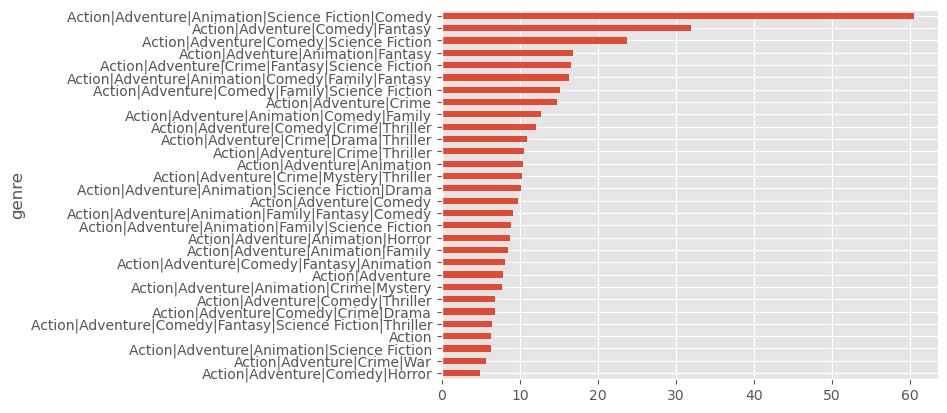

In [132]:
#combo of genres making a movie popular - large market
ax = popular_movies.groupby("genre")["popularity"].median().head(30).sort_values().plot(kind="barh")

In [556]:
merge_A = popular_movies.merge(movie_gross, on="title")
merge_A.drop(["year_x"], axis=1, inplace=True)
merge_A.rename(columns={"year_y": "year"}, inplace=True)

In [557]:
#cleaning up n/a in foreign gross
merge_A['foreign_gross'] = merge_A['foreign_gross'].fillna(value=500)
merge_A["foreign_gross"] = [float(str(i).replace(",", "")) for i in merge_A["foreign_gross"]]

#fill n/a values with median in domestic gross
merge_A['domestic_gross'] = merge_A['domestic_gross'].fillna(value=merge_A['domestic_gross'].median())

#rename N/A studios to "N/A"
merge_A["studio"] = merge_A["studio"].fillna(value="N/A")

In [558]:
merge_A.isna().sum()
merge_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2086 non-null   object        
 1   genre_ids          2086 non-null   object        
 2   id                 2086 non-null   int64         
 3   original_language  2086 non-null   object        
 4   original_title     2086 non-null   object        
 5   popularity         2086 non-null   float64       
 6   release_date       2086 non-null   datetime64[ns]
 7   vote_average       2086 non-null   float64       
 8   vote_count         2086 non-null   int64         
 9   month              2086 non-null   int64         
 10  genre              2086 non-null   object        
 11  studio             2086 non-null   object        
 12  domestic_gross     2086 non-null   float64       
 13  foreign_gross      2086 non-null   float64       
 14  year    

/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


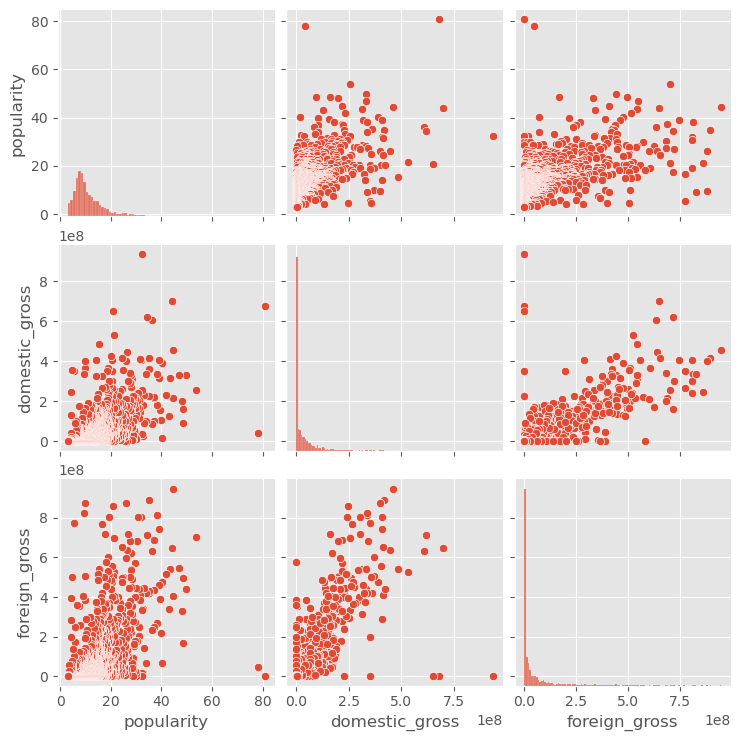

In [562]:
sns.pairplot(merge_A, vars=["popularity","domestic_gross","foreign_gross"])

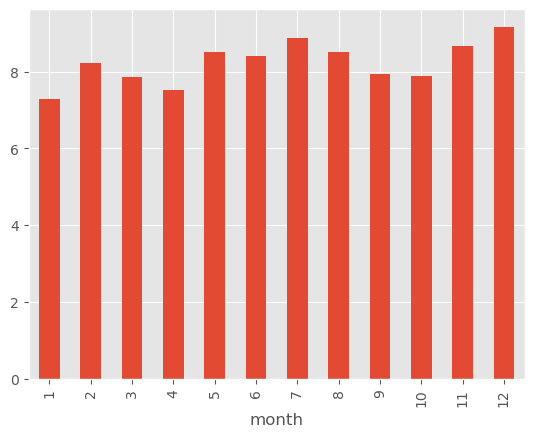

In [573]:
ax = popular_movies.groupby(['month'])['popularity'].mean().plot(kind='bar')

In [564]:
corr_matrix = merge_A[["popularity","domestic_gross","foreign_gross", "month"]].corr()
corr_matrix

,popularity,domestic_gross,foreign_gross,month
popularity,1.000000,0.639527,0.610942,0.069674
domestic_gross,0.639527,1.000000,0.788852,0.028366
foreign_gross,0.610942,0.788852,1.000000,0.032771
month,0.069674,0.028366,0.032771,1.000000


<Axes: >

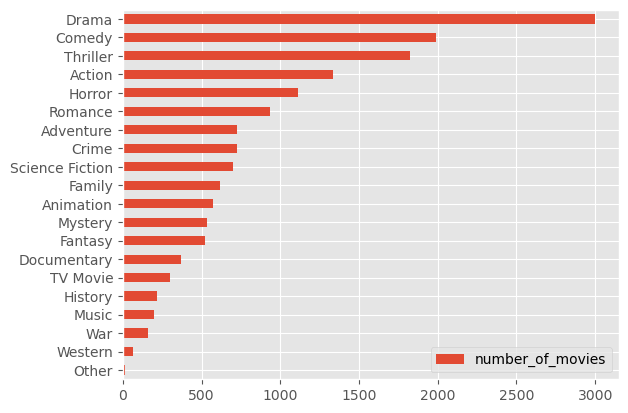

In [579]:
genre_count = {}

for genre in popular_movies["genre"]:
    movie_genres = genre.split("|")
    for movie_genre in movie_genres:
        if movie_genre not in genre_count:
            genre_count[movie_genre] = 1
        else:
            genre_count[movie_genre] += 1

popular_genre = pd.DataFrame.from_dict(genre_count, orient='index',columns=["number_of_movies"])
df = popular_genre.sort_values(by="number_of_movies")
df.plot(kind="barh")

In [461]:
corr_matrix = tmdb_movies[["popularity","vote_average","vote_count"]].corr()
corr_matrix

,popularity,vote_average,vote_count
popularity,1.000000,0.057178,0.685285
vote_average,0.057178,1.000000,0.079160
vote_count,0.685285,0.079160,1.000000


/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupi

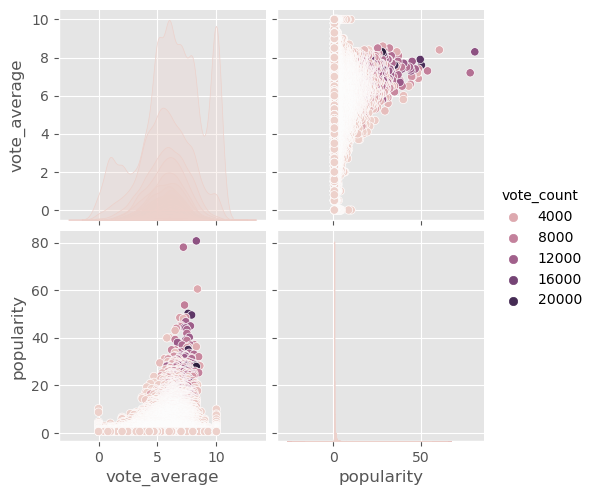

In [401]:
sns.pairplot(tmdb_movies,vars=["vote_average", "popularity"], hue="vote_count")

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***